# Task | <span style="color: darkblue">Analysing tweets of _The Squad_</span>


<!-- \ -->

<tr>
    <td> <img src="images/thesquad.jpeg" style="width: 685px;"/> </td>
    <td> <img src="images/jb.png" alt="Drawing" style="width: 296px;"/>  </td>
    <td> <img src="images/cb.png" alt="Drawing" style="width: 300px;"/> </td>    
</tr>


# Introduction


[_The Squad_](https://en.wikipedia.org/wiki/The_Squad_(United_States_Congress)) is a group of six members of the U.S. house of representatives. They are all on the left wing of the Democratic Party, under 50 and most known for their progressive ideas.

The group currently consists of (from left to right in images):
* Ilhan Omar, Minnesota
* Rashida Tlaib, Michigan
* Ayanna Pressley, Massachusetts
* Alexandria Ocasio-Cortez (AOC), New York
* Jamaal Bowman, New York
* Cori Bush, Missouri

The name "The Squad" arose after the first four members appeared in a [group picture](https://www.instagram.com/p/BqGTlEPBXXD/) which AOC published on her Instagram with the caption "Squad" in late 2018.  Since earlier this year (as announced on [twitter](https://twitter.com/CoriBush/status/1345804761380085760) with the caption "Squad up") Jamaal Bowman and Cori Bush have also joined the _Squad_. The term "squad" here refers to a self-chosen group of people with a "common identity and sense of solidarity"; the term arose in East Coast hip hop (examples: "Yeah, when I'm with my squad I cannot do no wrong" in [goosebumps](https://www.youtube.com/watch?v=Dst9gZkq1a8&ab_channel=TravisScottVEVO), Travis Scott and Kendrick Lamar; [Rock N Roll](https://www.youtube.com/watch?v=b8epyQ5MnFY&ab_channel=dokisaque34), Mos Def; [When Disaster Strikes](https://www.youtube.com/watch?v=-zn6PdEKfyU&ab_channel=BustaRhymes-Topic), Busta Rhymes).

The ideology of _The Squad_ and as being more than a group of political leaders is captured in the following [quote](https://twitter.com/justicedems/status/1150885904308981760) by Ayanna Pressley: 
>We are more than four people. We ran on a mandate to advocate for and to represent those ignored, left out, and left behind. Our squad is big. Our squad includes any person committed to creating a more equitable and just world. 

Issues that _The Squad_ advocate for include [Medicare for All](https://berniesanders.com/issues/medicare-for-all/), tuition-free public college, the [Green New Deal](https://en.wikipedia.org/wiki/Green_New_Deal), ending institutional racism, preventing discrimination based on sexual orientation or gender and abolishing U.S. Immigration and Customs Enforcement among others. They are outspoken and are changing the political landscape in the U.S. 

On that note, we thought it would be interesting to get to know a bit more about them and the recent political landscape in North America by analysing _The Squad_'s tweets from the past year.

## Data

The data can be found under the folder `data`. Within the `data` folder, there are two files with identical content: `the_squad.csv` and `the_squad.xlsx`. Pick one of them to use in this assignment. Each of these files contains twitter data on tweets (every row is one tweet) by the members of _The Squad_ such as the tweet text, the time at which it was posted, the number of times it is retweeted and liked.

FYI: This data was acquired from Twitter using their API and the Tweepy module (see notebook 6 if you're interested).

## Tasks

We would like to look through some recent tweets of the members of _The Squad_, and be able to understand certain characteristics of their tweets and through that their online presence and what they stand for. 

Make your code and results as pretty as possible, and feel free to use tabs and enumeration when printing text and formatting for the visualisations. 

This assignment is about getting familiar with Pandas' methods — we suggest going through the lecture and seminar notebooks on Pandas again. You can of course use any course material in this assignment!

You are not limited to the structure of the cells below with ` # Your code here` only. Organise your code the way you think is most readible and appropriate.

### Question 1: Pre-processing
* Add a column with a normalised version of the 'text' column. Use a tokenizer in your normalization function.

Continue to work with this column in the next tasks. You're of course free to add more columns if you think you need them. 



In [55]:
# Importing Libraries and reading csv using pandas
import pandas as pd
import re
import time
import matplotlib as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from  nltk.probability import FreqDist
df = pd.read_csv("data/the_squad.csv")
df.dropna(inplace = True)
#print("Total columns",df.iloc[0])

In [56]:
# getting text colum and colvert itto array and then normalize function is normalizing it
text=[]
for i in range(len(df)):
    text.append(df['text'].iloc[i])

def normalize(string):
    minimum_word_length=3
    no_punct = ""
    punctuations = '''!"#$%&'()*+,-./@:;<=>?[\]^_`{|}~'''
    for char in string:
        if char not in punctuations:
           no_punct = no_punct + char
    words=[t for t in no_punct.split()]
    if minimum_word_length:
        words = [i for i in words if len(i) > minimum_word_length]
    stop_words=stopwords.words("english")
    Words_WithOut_Stopwords=[w.lower() for w in words if not w in stop_words]
    return Words_WithOut_Stopwords

NormalizedList=[]
for i in range(len(text)):
   NormalizedList.append(normalize(text[i]))
print("Demo of Normalized Text :\n ",NormalizedList[50])

df['Normalized_Text']=NormalizedList
#print(df.shape)
#print(len(df))
df.to_csv('data/the_squad.csv', index = False)
df = pd.read_csv("data/the_squad.csv")


Demo of Normalized Text :
  ['yensidleanna46', 'immediate', 'improvement', 'would', 'require', 'influx', 'facilities', 'children', 'licensed', 'another', 'issue', 'whether', 'services', 'contracted', 'currently', 'begin', 'whether', 'facilities', 'controversial', 'records', 'homestead', 'reopened']


### Question 2: Description / statistics

Provide information on: 

* Number of tweets (per user and in total)
* Most retweeted tweet (per user and in total)
* Most liked tweet (per user and in total)


* Most frequent words (per user and in total)

You can present the answers in this notebook.

In [57]:
# Calculating Total Tweets and tweets of all users
TotalTweets=len(df)
v=df['username'].value_counts()
print("Total Number of Tweets: ",TotalTweets)
print("Number of Tweets by Jamaal Bowman : ",v['JamaalBowmanNY'],'/',TotalTweets)
print("Number of Tweets by Ilhan Omar : ",v['IlhanMN'],'/',TotalTweets)
print("Number of Tweets by Rashida Tlaib : ",v['RashidaTlaib'],'/',TotalTweets)
print("Number of Tweets by Ayanna Pressley : ",v['AyannaPressley'],'/',TotalTweets)
print("Number of Tweets by Cori Bush : ",v['CoriBush'],'/',TotalTweets)
print("Number of Tweets by Alexandria Ocasio-Cortez (AOC) : ",v['AOC'],'/',TotalTweets)


Total Number of Tweets:  17181
Number of Tweets by Jamaal Bowman :  3242 / 17181
Number of Tweets by Ilhan Omar :  3232 / 17181
Number of Tweets by Rashida Tlaib :  3226 / 17181
Number of Tweets by Ayanna Pressley :  2934 / 17181
Number of Tweets by Cori Bush :  2284 / 17181
Number of Tweets by Alexandria Ocasio-Cortez (AOC) :  2263 / 17181


In [58]:
#Printing Most Retweeted Tweet of the Dataset
print("Number of Retweets:",df['retweet_count'].max(),"\nMost Retweeted Tweet's index and text is: ",df.loc[df['retweet_count'] == df['retweet_count'].max()].Normalized_Text)

Number of Retweets: 2140550 
Most Retweeted Tweet's index and text is:  10587    ['chadwickboseman', 'httpstcoaz2jzdf5ai']
Name: Normalized_Text, dtype: object


In [59]:
#Function to find the and print the most Retweeted Tweet by users
def MostRetweetByUSer(string):
    y=df[df.username==string]
    y=y['retweet_count'].max()
    print("Number of Retweet of ",string,":",y,"\nIndex with Most Retweeted Tweet  of",string,":",df.loc[df['retweet_count'] == y].Normalized_Text,"\n")

In [60]:
#Calling Function by passing different  Usernames and printing Tweets
MostRetweetByUSer("AOC")
MostRetweetByUSer("IlhanMN")
MostRetweetByUSer("AyannaPressley")
MostRetweetByUSer("RashidaTlaib")
MostRetweetByUSer("JamaalBowmanNY")
MostRetweetByUSer("CoriBush")

Number of Retweet of  AOC : 284388 
Index with Most Retweeted Tweet  of AOC : 1008    ['kamalaharris', 'while', 'first', 'woman', 'o...
Name: Normalized_Text, dtype: object 

Number of Retweet of  IlhanMN : 317268 
Index with Most Retweeted Tweet  of IlhanMN : 2686    ['rihanna', 'aren’t', 'talking', 'farmersprote...
Name: Normalized_Text, dtype: object 

Number of Retweet of  AyannaPressley : 110028 
Index with Most Retweeted Tweet  of AyannaPressley : 7140     ['when', 'politicians', 'faith', 'excuse', 'pa...
10194    ['when', 'politicians', 'faith', 'excuse', 'pa...
Name: Normalized_Text, dtype: object 

Number of Retweet of  RashidaTlaib : 2140550 
Index with Most Retweeted Tweet  of RashidaTlaib : 10587    ['chadwickboseman', 'httpstcoaz2jzdf5ai']
Name: Normalized_Text, dtype: object 

Number of Retweet of  JamaalBowmanNY : 199606 
Index with Most Retweeted Tweet  of JamaalBowmanNY : 532      ['impeach']
12305    ['impeach']
Name: Normalized_Text, dtype: object 

Number of Retweet

In [61]:
#Most Liked Tweet of the DataSet
print("Number of Likes:",df['like_count'].max(),"\nMost Liked Tweet's index and text is: ",df.loc[df['like_count'] == df['like_count'].max()].Normalized_Text)

Number of Likes: 1674271 
Most Liked Tweet's index and text is:  532    ['impeach']
Name: Normalized_Text, dtype: object


In [72]:
#Function to find the and print the most Liked Tweet by users
def MostLikedTweetByUSer(string):
    y=df[df.username==string]
    y=y['like_count'].max()
   # print("Most Liked Tweet's of",string,":",df.loc[df['like_count'] == y].text.values,"\n")
    print("Number of Likes of ",string,":",y,"\nIndex with Most Liked Tweet  of",string,":",df.loc[df['like_count'] == y].Normalized_Text,"\n")

In [63]:
#Calling Function by passing different  Usernames and printing Liked Tweets
MostLikedTweetByUSer("AOC")
MostLikedTweetByUSer("IlhanMN")
MostLikedTweetByUSer("AyannaPressley")
MostLikedTweetByUSer("RashidaTlaib")
MostLikedTweetByUSer("JamaalBowmanNY")
MostLikedTweetByUSer("CoriBush")

Number of Likes of  AOC : 1674271 
Index with Most Liked Tweet  of AOC : 532    ['impeach']
Name: Normalized_Text, dtype: object 

Number of Likes of  IlhanMN : 830901 
Index with Most Liked Tweet  of IlhanMN : 3106    ['drawing', 'articles', 'impeachment', 'donald...
Name: Normalized_Text, dtype: object 

Number of Likes of  AyannaPressley : 386400 
Index with Most Liked Tweet  of AyannaPressley : 7530    ['year', 'white', 'supremacist', 'domestic', '...
Name: Normalized_Text, dtype: object 

Number of Likes of  RashidaTlaib : 310155 
Index with Most Liked Tweet  of RashidaTlaib : 9022    ['just', 'metal', 'detector', 'entering', 'hou...
Name: Normalized_Text, dtype: object 

Number of Likes of  JamaalBowmanNY : 214374 
Index with Most Liked Tweet  of JamaalBowmanNY : 13922    ['black', 'raised', 'single', 'mother', 'housi...
Name: Normalized_Text, dtype: object 

Number of Likes of  CoriBush : 748309 
Index with Most Liked Tweet  of CoriBush : 15102    ['what', 'mean', 'black', 'cong

In [74]:
#Printing 30 Most Frequent Words in the text column
text=""""""
text2=""""""
text=df['Normalized_Text'].tolist()
for i in text:
    text2+=i
print("Total Words: ",len(text2))
#words=word_tokenize(text2)
words=[t for t in text2.split()]
stop_words=stopwords.words("english")
Words_WithOut_Stopwords=[w for w in words if not w in stop_words]
print("Words with out Stop Word:",len(Words_WithOut_Stopwords))
Words_frequency=FreqDist(Words_WithOut_Stopwords)
print("15 most Frequent words of all Users : \n")
for i in Words_frequency.most_common(15):
    print(i)

Total Words:  2435496
Words with out Stop Word: 198008
15 most Frequent words of all Users : 

("'people',", 1725)
("'need',", 1046)
("'black',", 1008)
("'this',", 880)
("'it’s',", 775)
("'vote',", 726)
("'today',", 704)
("'congress',", 688)
("'thank',", 682)
("'like',", 660)
("'justice',", 649)
("'time',", 639)
("'make',", 608)
("'must',", 604)
("'right',", 598)


In [77]:
#Function of Printing the most Frequent Words by Different Users
def MostFrequentWords(string):
    text=""""""
    text2=""""""
    y=df[df.username==string]
    text=y['Normalized_Text'].tolist()
    for i in text:
        text2+=i
    words=[t for t in text2.split()]
    stop_words=stopwords.words("english")
    Words_WithOut_Stopwords=[w for w in words if not w in stop_words]
    Words_frequency=FreqDist(Words_WithOut_Stopwords)
    print("15 most Frequent words used by  ",string," : \n")
    for i in Words_frequency.most_common(15):
        print(i)


In [78]:
#Calling Function by giving ALl users
MostFrequentWords("AOC")
MostFrequentWords("IlhanMN")
MostFrequentWords("AyannaPressley")
MostFrequentWords("RashidaTlaib")
MostFrequentWords("JamaalBowmanNY")
MostFrequentWords("CoriBush")

15 most Frequent words used by   AOC  : 

("'people',", 271)
("'it’s',", 244)
("'this',", 137)
("'need',", 132)
("'time',", 116)
("'don’t',", 114)
("'congress',", 113)
("'like',", 105)
("'covid',", 104)
("'thank',", 100)
("'vote',", 98)
("'know',", 89)
("'workers',", 88)
("'many',", 87)
("'house',", 85)
15 most Frequent words used by   IlhanMN  : 

("'people',", 356)
("'ilhanmn',", 228)
("'it’s',", 195)
("'trump',", 175)
("'vote',", 164)
("'ilhan',", 157)
("'this',", 146)
("'need',", 134)
("'make',", 128)
("'congress',", 124)
("'country',", 121)
("'justice',", 120)
("'omar',", 117)
("'time',", 114)
("'must',", 110)
15 most Frequent words used by   AyannaPressley  : 

("'ayannapressley',", 334)
("'black',", 276)
("'people',", 232)
("'justice',", 195)
("'thank',", 154)
("'this',", 139)
("'today',", 136)
("'need',", 112)
("'right',", 109)
("'vote',", 103)
("'must',", 102)
("'community',", 102)
("'like',", 98)
("'love',", 96)
("'work',", 96)
15 most Frequent words used by   RashidaTlaib  :

### Question 3: Analysis

* Do the members of _The Squad_ mention each other? (in a tweet this is done by @username)

    * Who is the most mentioned member of _The Squad_ by members of _The Squad_? 
    * For every member of _The Squad_, find out how many times they mention every other member. Try to present the result as a DataFrame. Briefly interpret the result (few sentences maximum)



In [67]:
#Script to Find Most Mentioned Member of the Group
text=""""""
text2=""""""
text=df['text'].tolist()
for i in text:
    text2+=i
words=[t for t in text2.split()]
stop_words=stopwords.words("english")
Words_WithOut_Stopwords=[w for w in words if not w in stop_words]
attherate=[]
a=0
b=0
c=0
d=0
e=0
f=0
for i in Words_WithOut_Stopwords:
    if(i[0]=='@'):
        if("AOC" in i):
            a+=1
        if("IlhanMN" in i):
            b+=1
        if("AyannaPressley" in i):
            c+=1
        if("RashidaTlaib" in i):
            d+=1
        if("JamaalBowmanNY" in i):
            e+=1
        if("CoriBush" in i):
            f+=1

print("AyannaPressley is the most mentioned member of the groub and mentioned times:",c )

AyannaPressley is the most mentioned member of the groub and mentioned times: 801


In [70]:
# Function to find out the Mentioned frequency by different users
def FindMentioned(string):
    y=df[df.username==string]
    y=y['text'].tolist()
    text2=""""""
    for i in y:
        text2+=i 
    words=[t for t in text2.split()]
    stop_words=stopwords.words("english")
    Words_WithOut_Stopwords=[w for w in words if not w in stop_words]
    attherate=[]
    for i in Words_WithOut_Stopwords:
        if(i[0]=='@'):
            if(i in ['@AOC','@IlhanMN','@AyannaPressley','@RashidaTlaib','@JamaalBowmanNY','@CoriBush',
                     "@AOC's","@IlhanMN's","@AyannaPressley's","@RashidaTlaib's","@JamaalBowmanNY's","@CoriBush's"]
                       and i not in ["@"+string, "@"+string+"'s"]):
                attherate.append(i)
    Words_frequency=FreqDist(attherate)
    dff = pd.DataFrame(Words_frequency.items() , columns =['UserName', 'Number of Mentioned']) 
    print("By ",string,"\n",dff,"\n")

In [71]:
#Calling Function to Print Mentioned Frequency by passing Usernames
FindMentioned("AOC")
FindMentioned("IlhanMN")
FindMentioned("AyannaPressley")
FindMentioned("RashidaTlaib")
FindMentioned("JamaalBowmanNY")
FindMentioned("CoriBush")


By  AOC 
           UserName  Number of Mentioned
0    @RashidaTlaib                   13
1         @IlhanMN                    9
2        @CoriBush                    8
3  @JamaalBowmanNY                    8
4  @AyannaPressley                    8 

By  IlhanMN 
           UserName  Number of Mentioned
0             @AOC                   32
1  @AyannaPressley                   14
2    @RashidaTlaib                   20
3        @CoriBush                   15
4  @JamaalBowmanNY                    7
5      @CoriBush's                    2 

By  AyannaPressley 
           UserName  Number of Mentioned
0         @IlhanMN                   49
1             @AOC                   42
2        @CoriBush                   22
3  @JamaalBowmanNY                   21
4    @RashidaTlaib                   34
5           @AOC's                    1 

By  RashidaTlaib 
           UserName  Number of Mentioned
0  @AyannaPressley                   39
1             @AOC                   31
2        @

*Edit this cell by double clicking it, write down your analysis of these results in a few sentences max.*

### Question 4: Visualization

1. Plot the number of tweets (for all members in _The Squad_ in total) per week. 
    * Interpret the graph. Can you explain the fluctuations?
    

2. Plot the (Twitter) popularity per member in _The Squad_ over time (choose the frequency of your choice) by:
    * Number of retweets
    * Number of likes
  
  You can either try to plot these in the same figure, or create multiple figures.
  
  Provide a title, correct axis labels, and a legend for your graphs. 

[Text(0.5, 0, 'Weeks'), Text(0, 0.5, 'Frequency of Tweets')]

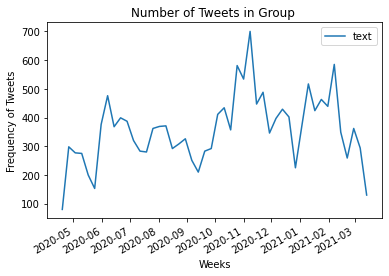

In [44]:
df=df.sort_values(by=['created_at'])
df2=pd.DataFrame(df.text,index=(pd.to_datetime(df.created_at)))
df2.text=1
df2.index.name="The Squad"
frequency=df2.resample('W').sum()

frequency.plot(x_compat=True,title='Number of Tweets in Group ').set(xlabel='Weeks', ylabel='Frequency of Tweets')

In [45]:
#Your code here
def pop_Like(string):
    df2=df.sort_values(by=['created_at'])
    a=df2[df2.username==string]
    A=pd.DataFrame(a.like_count.values,index=(pd.to_datetime(a.created_at)),columns=['Liked_Frequency'])
    A.index.name=string
    frequency=A.resample('W-MON').sum()
    #print("liked frequency of ",string,"\n",frequency,'\n')
    return frequency
    
a1=pop_Like("AOC")
b1=pop_Like("IlhanMN")
c1=pop_Like("AyannaPressley")
d1=pop_Like("RashidaTlaib")
e1=pop_Like("JamaalBowmanNY")
f1=pop_Like("CoriBush")

[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Frequency of Liked Tweets & Retweets')]

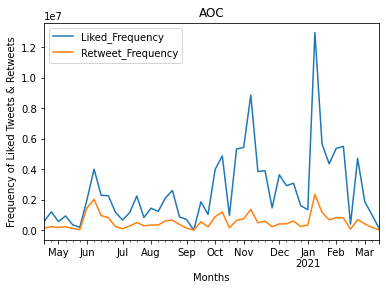

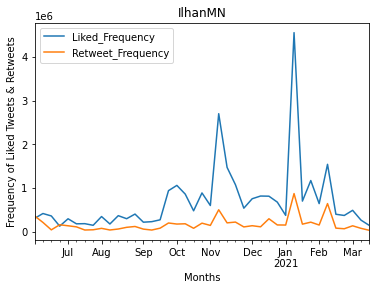

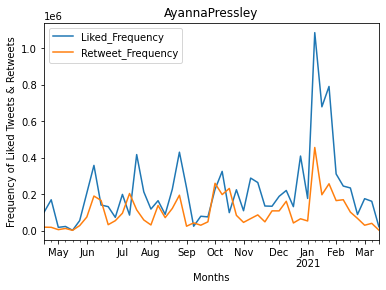

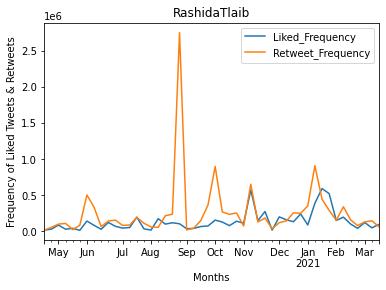

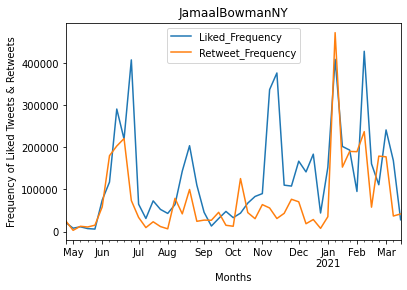

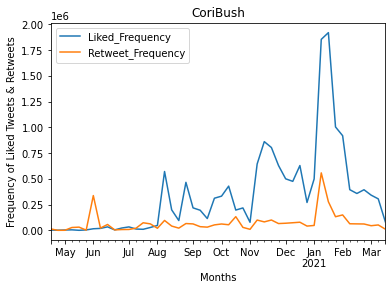

In [46]:
def pop_ReTweet(string):
    df2=df.sort_values(by=['created_at'])
    a=df2[df2.username==string]
    A=pd.DataFrame(a.retweet_count.values,index=(pd.to_datetime(a.created_at)),columns=['Retweet_Frequency'])
    A.index.name=string
    frequency=A.resample('W-MON').sum()
    #print("Retweet frequency of ",string,"\n",frequency,'\n')
    return frequency
#Calling Functions to get frequency
a=pop_ReTweet("AOC")
b=pop_ReTweet("IlhanMN")
c=pop_ReTweet("AyannaPressley")
d=pop_ReTweet("RashidaTlaib")
e=pop_ReTweet("JamaalBowmanNY")
f=pop_ReTweet("CoriBush")
#Joining Two Pandas Dataframe of Retweets and Liked Tweets
r1=a1.join(a)
r2=b1.join(b)
r3=c1.join(c)
r4=d1.join(d)
r5=e1.join(e)
r6=f1.join(f)
#Ploting Line Plots from Pandas 
r1.plot(title='AOC').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')
r2.plot(title='IlhanMN').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')
r3.plot(title='AyannaPressley').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')
r4.plot(title='RashidaTlaib').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')
r5.plot(title='JamaalBowmanNY').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')
r6.plot(title='CoriBush').set(xlabel='Months', ylabel='Frequency of Liked Tweets & Retweets')

